In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
import locale
from locale import atof

In [71]:
df = pd.read_csv('/Users/yuanzhou/Desktop/IEOR_290/Project/Independent_Variable_Input_Sheet1.csv')
dt = pd.read_csv('/Users/yuanzhou/Desktop/IEOR_290/Project/Output_Data_Sheet1.csv')

In [72]:
df = df[['Founding Time','Full Name','Primary Company','Previous startups?',\
         'Consulting before start-up','Standardized University',\
         'Standardized Major','Degree Type','Standardized Graduate Institution',\
        'Ever served as TA/Teacher/Professor/Mentor?','# Years of employment (non-founder)']]
dt = dt[['Full Name','Primary Company','Seed Valuation','A Valuation','B Valuation','Valuation Increase',\
        'CEO at A','CEO at B']]

In [62]:
df1 = df.iloc[0:676,:]
dt1 = dt.iloc[0:676,:]

In [63]:
dft = pd.merge(df1, dt1, how='inner', on=['Full Name'])

In [64]:
dft.replace('#VALUE!',np.NaN,inplace=True)
dft.replace('#DIV/0!',np.NaN,inplace=True)
dft['Ever served as TA/Teacher/Professor/Mentor?'] = dft['Ever served as TA/Teacher/Professor/Mentor?'].fillna(0)
dft = dft.drop(['Standardized Graduate Institution','Seed Valuation','Primary Company_y'],axis=1) # Too many null value for this two column
dft['# Years of employment (non-founder)'] = dft['# Years of employment (non-founder)'].fillna((dft['# Years of employment (non-founder)'].mean()))

In [52]:
dft.isnull().sum()

Founding Time                                   46
Full Name                                        0
Primary Company_x                                0
Previous startups?                               0
Consulting before start-up                       0
Standardized University                         92
Standardized Major                             156
Degree Type                                    172
Ever served as TA/Teacher/Professor/Mentor?      0
# Years of employment (non-founder)              0
Primary Company_y                                0
A Valuation                                     80
B Valuation                                    116
Valuation Increase                             309
CEO at A                                        14
CEO at B                                        38
dtype: int64

In [66]:
dft.dtypes

Founding Time                                  float64
Full Name                                       object
Primary Company_x                               object
Previous startups?                             float64
Consulting before start-up                     float64
Standardized University                         object
Standardized Major                              object
Degree Type                                     object
Ever served as TA/Teacher/Professor/Mentor?    float64
# Years of employment (non-founder)            float64
Primary Company_y                               object
A Valuation                                     object
B Valuation                                     object
Valuation Increase                              object
CEO at A                                       float64
CEO at B                                       float64
dtype: object

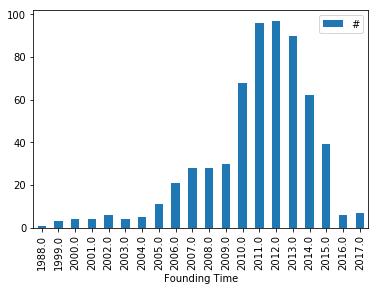

In [28]:
# Start Up History
dff0 = dft.groupby(df1['Founding Time']).count()
dff0 = dff0[['Full Name']]
dff0.columns=['#']
dff0.plot(kind = 'bar')
plt.show()

In [6]:
dff = df1.groupby(df1['Standardized University']).count()
dff = dff[['Full Name']]
dff.astype(int)
dff = dff.sort_values(by=['Full Name'],ascending = False)
dff.columns=['#']
dff

,#
Standardized University,
Stanford University,33
Harvard University,22
University of Pennsylvania,17
University of California Berkeley,16
Massachusetts Institute of Technology,15
Princeton University,11
Cornell University,11
Brigham Young University,10
Dartmouth College,10


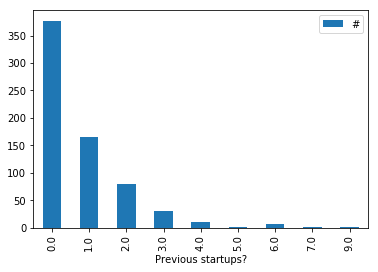

In [7]:
dff2 = df1.groupby(df1['Previous startups?']).count()
dff2 = dff2[['Full Name']]
dff2.columns=['#']
dff2.plot(kind = 'bar')
plt.show()

In [8]:
dff3 = df1.groupby(df1['Consulting before start-up']).count()
dff3 = dff3[['Full Name']]
dff3.columns=['#']
dff3

,#
Consulting before start-up,
0.0,557
1.0,119


In [9]:
dff4 = df1.groupby(df1['Standardized Major']).count()
dff4 = dff4[['Full Name']]
dff4.astype(int)
dff4 = dff4.sort_values(by=['Full Name'],ascending = False)
dff4.columns=['#']
dff4

,#
Standardized Major,
Computer Science,126
Business,64
Electrical Engineering,55
Economics,46
Political Science,30
Operations Research,25
Engineering,24
Biology,14
Physics,14


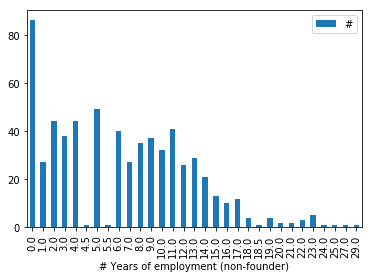

In [10]:
dff5 = df1.groupby(df1['# Years of employment (non-founder)']).count()
dff5 = dff5[['Full Name']]
dff5.astype(int)
dff5.columns=['#']
dff5.plot(kind = 'bar')
plt.show()

In [11]:
dff6 = df1.groupby(df1['Ever served as TA/Teacher/Professor/Mentor?']).count()
dff6 = dff6[['Full Name']]
dff6.astype(int)
dff6.columns=['#']
dff6

,#
Ever served as TA/Teacher/Professor/Mentor?,
0.0,463
1.0,176


In [12]:
df1.head()

,Founding Time,Full Name,Primary Company,Previous startups?,Consulting before start-up,Standardized University,Standardized Major,Degree Type,Standardized Graduate Institution,Ever served as TA/Teacher/Professor/Mentor?,# Years of employment (non-founder)
0,2005.0,Chad Hurley,YouTube,0.0,0.0,Indiana University of Pennsylvania,Design,NaN,NaN,0.0,4.0
1,2008.0,Gwyneth Paltrow,Goop Inc.,0.0,0.0,NaN,NaN,NaN,NaN,0.0,12.0
2,2007.0,Jason Calacanis,Inside.com,3.0,0.0,Fordham University,Psychology,BA,NaN,0.0,4.0
3,2010.0,Tony Fadell,Nest Labs,1.0,0.0,University of Michigan,Computer Science,BS,NaN,0.0,18.0
4,2005.0,Matt Mullenweg,Automattic,1.0,0.0,University of Houston,NaN,NaN,NaN,0.0,15.0


In [83]:
dft.head()

,Founding Time,Full Name,Primary Company_x,Previous startups?,Consulting before start-up,Standardized University,Standardized Major,Degree Type,Ever served as TA/Teacher/Professor/Mentor?,# Years of employment (non-founder),Primary Company_y,A Valuation,B Valuation,Valuation Increase,CEO at A,CEO at B
0,2005.0,Chad Hurley,YouTube,0.0,0.0,Indiana University of Pennsylvania,Design,NaN,0.0,4.0,YouTube,"14,000,000.00","88,400,000.00",6.314285714,1.0,1.0
1,2008.0,Gwyneth Paltrow,Goop Inc.,0.0,0.0,NaN,NaN,NaN,0.0,12.0,Goop Inc.,"40,000,000.00","65,000,000.00",1.625,1.0,1.0
2,2007.0,Jason Calacanis,Inside.com,3.0,0.0,Fordham University,Psychology,BA,0.0,4.0,Inside.com,"11,250,000.00",NaN,NaN,1.0,NaN
3,2010.0,Tony Fadell,Nest Labs,1.0,0.0,University of Michigan,Computer Science,BS,0.0,18.0,Nest Labs,"49,210,000.00","288,120,000.00",5.854907539,1.0,1.0
4,2005.0,Matt Mullenweg,Automattic,1.0,0.0,University of Houston,NaN,NaN,0.0,15.0,Automattic,"8,650,000.00","238,590,000.00",27.58265896,1.0,1.0
